# Rating Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("amazon_co-ecommerce_sample.csv")

In [3]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [5]:
df = df[['product_name', 'number_of_reviews', 'average_review_rating', 'customer_reviews']]
df.shape

(10000, 4)

In [6]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

## Preprocess the customer reviews

In [7]:
def preprocess(orig):
    
    orig=orig.translate(str.maketrans('', '', string.punctuation))
    
    tokens_o=word_tokenize(orig)

    #lowerCase
    tokens_o = [token.lower() for token in tokens_o]

    stop_words=set(stopwords.words('english'))

    #remove stop words
    tokens_o = [w for w in tokens_o if not w in stop_words]

    #lemmatization
    lemmatizer = WordNetLemmatizer()

    tokens_o = [lemmatizer.lemmatize(w) for w in tokens_o]
    
    return tokens_o

## Example of preprocessed review

In [8]:
print(preprocess(df['customer_reviews'][0]))

['worth', 'buying', 'picture', 'alone', 'ever', '40', '6', 'april', '2014', 'copnovelist', '6', 'april', '2014', 'part', 'magic', 'growing', 'boy', 'buy', 'given', 'new', 'hornby', 'catalogue', 'every', 'year', 'even', 'included', '90', 'product', 'previous', 'year', 'ive', 'still', 'got', 'old', 'one', 'dating', 'back', '70', '80', 'somewhere', 'day', 'catalogue', 'especially', 'informative', 'tell', 'vintage', 'rolling', 'stock', 'useful', 'dedicating', 'railway', 'one', 'particular', 'era', 'train', 'company', 'amazing', 'detail', 'fabulous', 'photography', '50', '11', 'april', '2015', 'richard', '11', 'april', '2015', 'amazing', 'detail', 'every', 'credit', 'photographer', 'book', 'worthy', 'reference', 'manual', 'well', 'sale', 'brochure', 'even', 'passing', 'interest', 'hobby', 'transported', 'another', 'time', 'younger', 'awe', 'big', 'train', 'great', 'purchase', '50', '23', 'april', '2014', 'pinkhandbag', '23', 'april', '2014', 'purchased', 'behalf', 'dad', 'always', 'asking',

## Using textblob library to perform sentiment analysis and get polarity

In [9]:
import textblob
from textblob import TextBlob

In [10]:
helper = lambda x: 5 if(x>5) else x
pol = lambda x: helper(float(((TextBlob(x).sentiment.polarity + 1)*3)))

In [11]:
polarity = pol(df['customer_reviews'][0])
print("Example polarity: ",polarity)

Example polarity:  4.083880266075388


## Handling null values

In [12]:
df.isna().sum()

product_name              0
number_of_reviews        18
average_review_rating    18
customer_reviews         21
dtype: int64

In [13]:
df['number_of_reviews'] = df['number_of_reviews'].fillna("0")
df['average_review_rating'] = df['average_review_rating'].fillna("1.0")
df['customer_reviews'] = df['customer_reviews'].fillna("Neutral")

df.isna().sum()

product_name             0
number_of_reviews        0
average_review_rating    0
customer_reviews         0
dtype: int64

In [14]:
extract_rating = lambda x: float(x.split()[0]) if(x) else "1"

df['average_review_rating'] = df['average_review_rating'].apply(extract_rating)

## Apply sentiment analysis and get polarity

In [15]:
df['polarity'] = df['customer_reviews'].apply(pol)

In [16]:
df.head()

,product_name,number_of_reviews,average_review_rating,customer_reviews,polarity
0,Hornby 2014 Catalogue,15,4.9,Worth Buying For The Pictures Alone (As Ever) ...,4.083880
1,FunkyBuys® Large Christmas Holiday Express Fes...,2,4.5,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,5.000000
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,17,3.9,**Highly Recommended!** // 5.0 // 26 May 2015 ...,3.763589
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,1,5.0,I love it // 5.0 // 22 July 2013 // By\n \n...,4.500000
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,3,4.7,Birthday present // 5.0 // 14 April 2014 // By...,3.879375


In [17]:
X=df.iloc[:,4].values
y=df.iloc[:,2].values

## Visualize how actual rating varies with polarity

<AxesSubplot:>

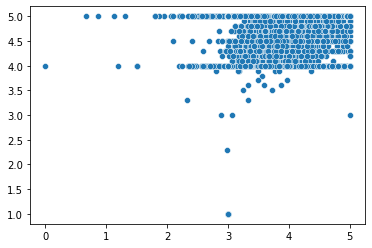

In [18]:
import seaborn as sns
sns.scatterplot(x=X, y = y)

In [19]:
import matplotlib.pyplot as plt

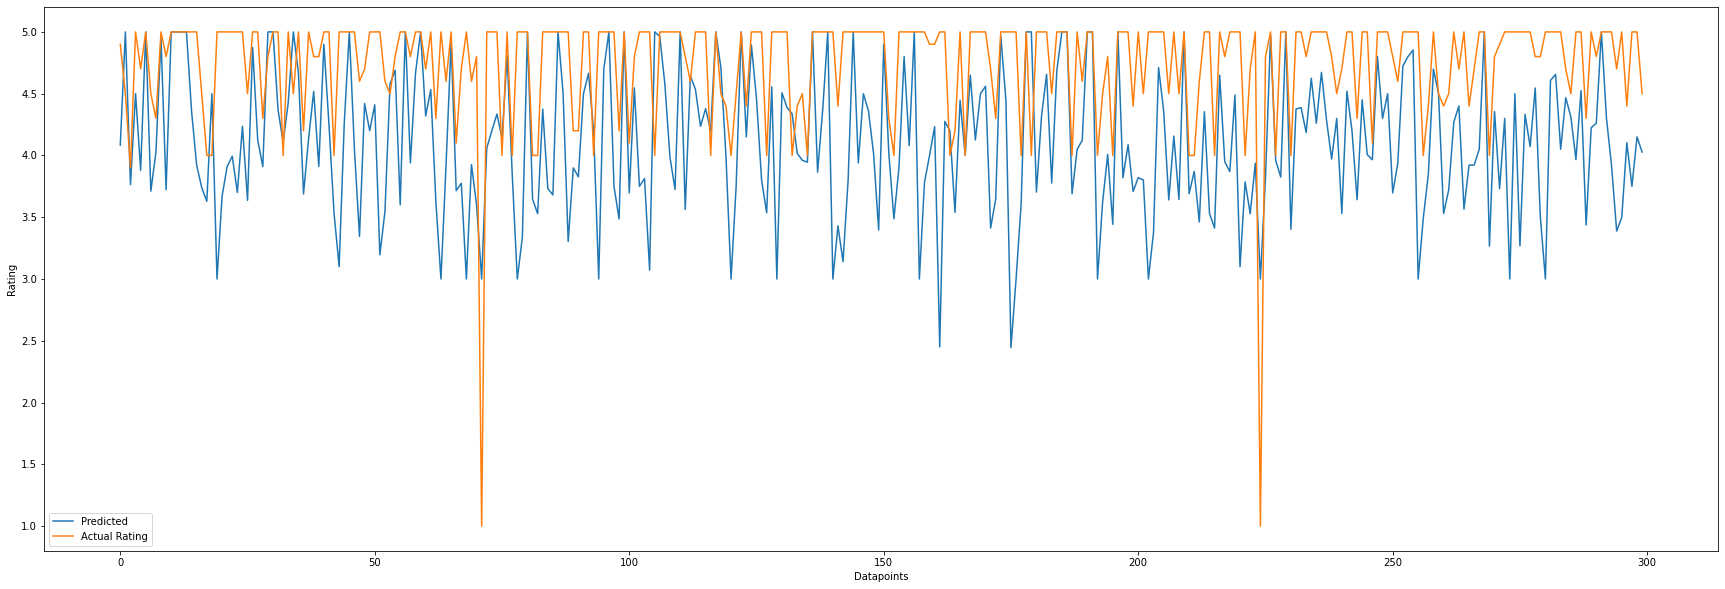

In [20]:
plt.figure(figsize=(30,10))

plt.plot(X[:300], label='Predicted')
plt.xlabel('Datapoints')
plt.plot(y[:300], label='Actual Rating')
plt.ylabel('Rating')
plt.legend()